In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
from matplotlib import pyplot as plt
from core import generate_data
import os
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

from multiple_testing import generate_fake_data
%load_ext autoreload
%autoreload 2


In [2]:
generate_fake_data

<function multiple_testing.generate_fake_data(N, T_obs, s=10, strong_factor_uniform_bound=0.5, noise_std=1, xsec_cov=0.5)>

In [9]:
T = 300
N = 20
full_beta, noises, jump_idces, Y, X = generate_data(T,N, n_jumps=10, level_bounds=5, show_plot=False, partial_effect_ratio = 1,heavy_tail = False, poission_corruption=False, staircase=False, AR=False)

In [8]:
np.mean(full_beta**2)

0.49756964296060074

In [278]:
X = np.tril(np.ones((T, T)), k=0)
Y = X @ full_beta + noises
Y_pure = X @ full_beta

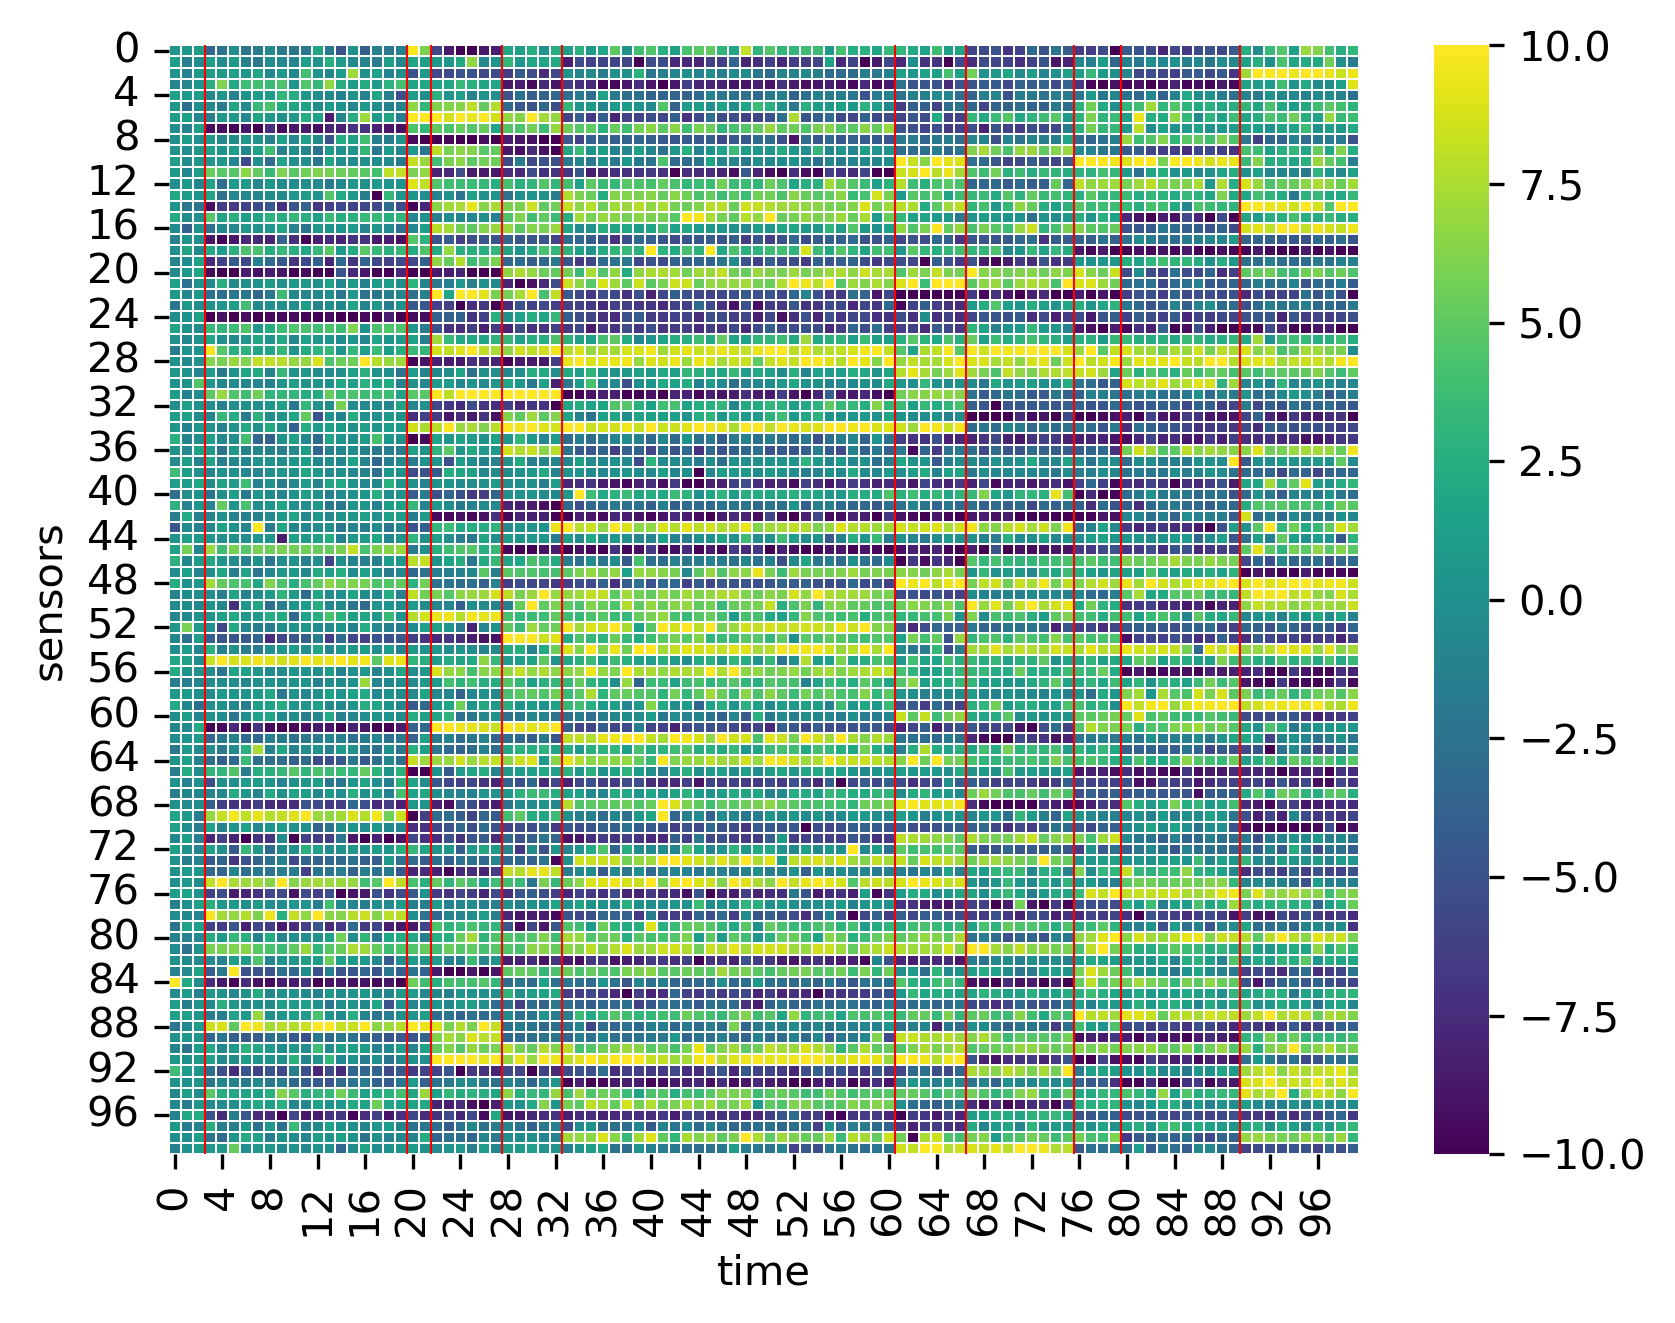

In [279]:
cmap = sn.color_palette("viridis", 8, as_cmap=True)
ax = sn.heatmap(Y.T, cmap = cmap, vmin = -10, vmax =10,linewidths=0.1, linecolor='white')
ax.set_xlabel("time")
ax.set_ylabel("sensors")

ax.vlines(jump_idces, *ax.get_ylim(), linestyles = 'solid', linewidths = 0.5, color = 'red')
# ax.legend(['true jumps'])

In [110]:
nruns = 20


In [6]:
#check if we have gotten all the files as all runs finishes
import os
files = os.listdir('results')
tables = []
for partial_effect_ratio in [1,0.5]:
    for level_bounds in range(1,11):
        for n in np.array([2e1]).astype(int):
            n_runs=20
            T=300
            N=n
            n_jumps=10
            level_bounds=level_bounds
            min_gaps=0
            partial_effect_ratio=partial_effect_ratio
            heavy_tail=False
            poission_corruption=False
            J = 0.9
            
            fname = f"nruns={n_runs}_T={T}_N={N}_n_jumps={n_jumps}_level_bounds={level_bounds}_min_gaps={min_gaps}_partial_effect_ratio={partial_effect_ratio}_heavy_tail={heavy_tail}_poission_corruption{poission_corruption}_J={J}.csv"
            if fname not in files:
                print(fname)
            else:
                tables.append(pd.read_csv(f'results/{fname}', index_col=[0,1]))

            # print(f"results/nruns={n_runs}_T={T}_N={N}_n_jumps={n_jumps}_level_bounds={level_bounds}_min_gaps={min_gaps}_partial_effect_ratio={partial_effect_ratio}_heavy_tail={heavy_tail}_poission_corruption{poission_corruption}.csv")

In [15]:
#check if we have gotten all the files as all runs finishes
files = os.listdir('results_simple_random_JT_JC')
tables = []
n = 20
partial_effect_ratio = 0.5
J=0.8
for level_bounds in [0.1,0.2,0.5,1,2,5]:
    
    n_runs=10
    T=300
    N=n
    n_jumps=10
    level_bounds=level_bounds
    min_gaps=0
    partial_effect_ratio=partial_effect_ratio
    heavy_tail=False
    poission_corruption=False
    fname = f"nruns={n_runs}_T={T}_N={N}_n_jumps={n_jumps}_level_bounds={level_bounds}_min_gaps={min_gaps}_partial_effect_ratio={partial_effect_ratio}_heavy_tail={heavy_tail}_poission_corruption={poission_corruption}_J={J}.csv"
    if fname not in files:
        print(fname)
    tables.append(pd.read_csv(f'results_simple_random_JT_JC/{fname}', index_col=[0,1]))

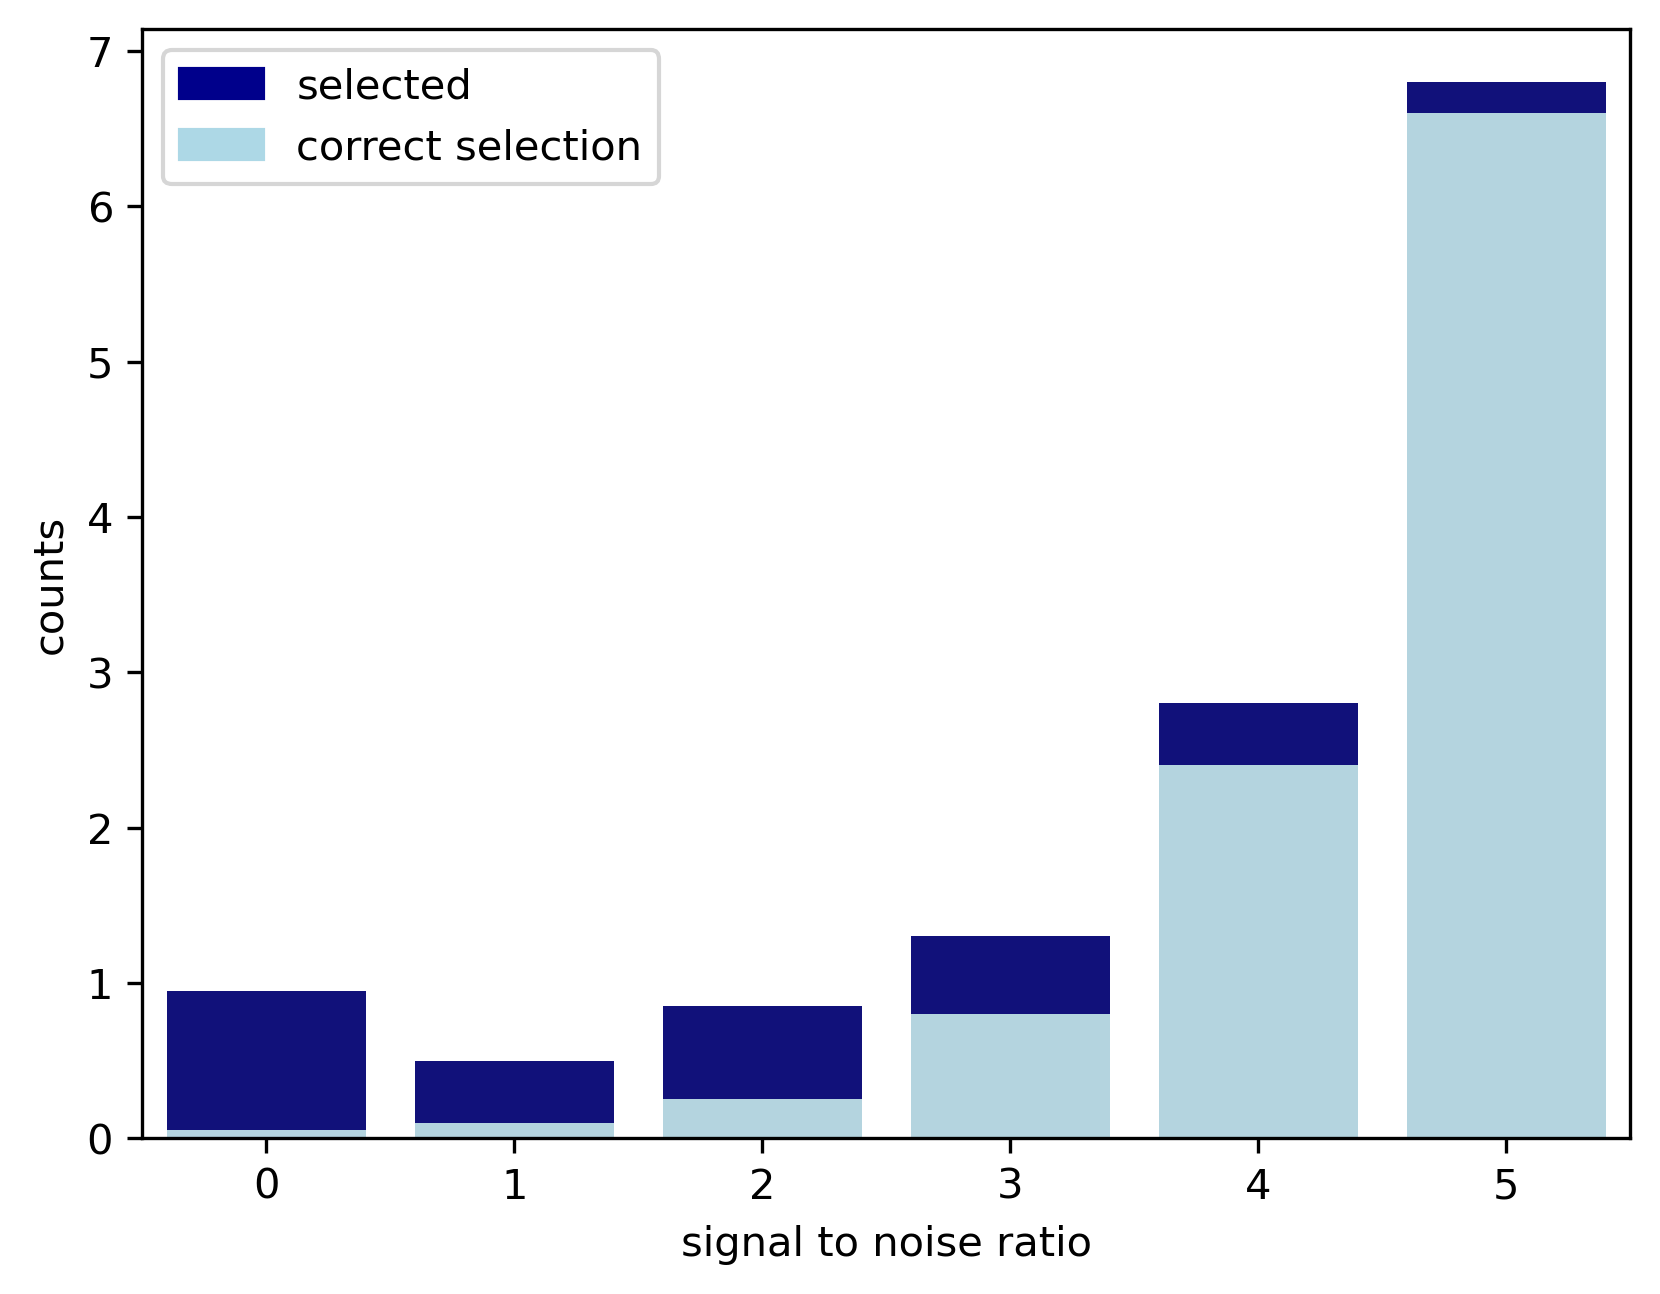

In [16]:
import matplotlib.patches as mpatches

level_bounds = list([0.1,0.2,0.5,1,2,5])

selected = [t.loc[('mean','posi')]['# selected'] for t in tables]
correct_selected =[t.loc[('mean','posi')]['# correct selection'] for t in tables]
bar1 = sn.barplot( data=np.array([level_bounds,selected]), color='darkblue',errorbar = None)

bar2 = sn.barplot( data=np.array([level_bounds,correct_selected]), color='lightblue',errorbar = None)

# add legend
top_bar = mpatches.Patch(color='darkblue', label='selected')
bottom_bar = mpatches.Patch(color='lightblue', label='correct selection')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('signal to noise ratio')
plt.ylabel('counts')
# show the graph
plt.show()

In [21]:
for i in range(len(tables)):
    tables[i]['sig_to_noise'] = 1+i

In [22]:
tmp = pd.concat([t.loc['mean'] for t in tables]).reset_index()

In [25]:
sn.color_palette("hls", 7)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.8169142857142857, 0.33999999999999997),
 (0.4573714285714283, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.6683428571428571),
 (0.33999999999999997, 0.6059428571428571, 0.86),
 (0.5197714285714281, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7545142857142858)]

In [17]:
bar1 = sn.lineplot(
    data=tmp, 
    x="sig_to_noise", y="# selected", hue="method",
     palette=sn.color_palette("hls", 5), alpha=.9
)
bar2 = sn.lineplot(
    data=tmp, 
    x="sig_to_noise", y="# correct selection", hue="method",
 palette=sn.color_palette("hls", 5), alpha=.9, linestyle='dashed', legend=None
)
# bar1 = sn.barplot( data=np.array([level_bounds,selected]), color='darkblue',errorbar = None)

# bar2 = sn.barplot( data=np.array([level_bounds,correct_selected]), color='lightblue',errorbar = None)

# add legend


# plt.legend(handles=[top_bar, bottom_bar])
# plt.xlabel('signal to noise ratio')
# plt.ylabel('counts')
# show the graph
plt.hlines([10],xmax = 10,xmin = 1, color='red',linestyles='dashed', alpha = 0.5, linewidths = 0.5)
plt.title(f'N={n},Partial={partial_effect_ratio},J={J}')
plt.savefig(f'figs/N={n},Partial={partial_effect_ratio}_J={J}.png')
plt.show()

ValueError: Could not interpret value `sig_to_noise` for parameter `x`

In [13]:
dir = "results_simple_random_full"
files = os.listdir(dir)
tables = []
cols = ['staircase', 'T', 'N','level_bounds','J']

for fname in files:
    if ".csv" in fname:
        tb = pd.read_csv(f'results/{fname}', index_col=[0,1])
        for col in cols:
            tb[col] = fname.split(col+"=")[1].split('_')[0].strip('.csv')
        tables.append(tb)


pd.concat(tables).to_csv(f"{dir}/full_result.csv")
tmp = pd.concat([t.loc['mean'] for t in tables]).drop(["ins_mse", "ins_mae", "oos_mse", "oos_mae"],axis = 1)
tmp.to_csv(f"{dir}/mean_result.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'results/nruns=10_T=300_N=200_n_jumps=10_level_bounds=0.1_min_gaps=0_partial_effect_ratio=1_heavy_tail=False_poission_corruption=False_J=0.8_staircase=False.csv'

precision        recall      accuracy  \
           method                                                       
mean       posi                  0.406053  2.600000e-01  9.646667e-01   
           posi with JC algo     0.248824  7.200000e-01  9.170000e-01   
           rdp_union             0.104152  8.900000e-01  7.400000e-01   
           rdp_intersection           NaN  0.000000e+00  9.666667e-01   
           rdp_majority_voting   0.650000  1.300000e-01  9.686667e-01   
           panel_rdp             1.000000  1.000000e-01  9.700000e-01   
           bonf_selection             NaN  2.100000e-01  9.680000e-01   
           bonf with JC algo     0.351526  6.300000e-01  9.480000e-01   
           sbs                   0.656667  2.500000e-01  9.703333e-01   
           dcbs                  0.847619  5.400000e-01  9.810000e-01   
std        posi                  0.190916  1.685230e-01  6.531973e-03   
           posi with JC algo     0.017748  8.717798e-02  1.433333e-02   
           rdp_union             0.007350  3.000000e-02  1.897367e-02   
           rdp_intersection           NaN  0.000000e+00  1.110223e-16   
           rdp_majority_voting   0.229129  4.582576e-02  3.055050e-03   
           panel_rdp             0.000000  1.387779e-17  0.000000e+00   
           bonf_selection             NaN  1.445683e-01  4.988877e-03   
           bonf with JC algo     0.041847  1.004988e-01  8.844333e-03   
           sbs                   0.297041  1.118034e-01  7.371115e-03   
           dcbs                  0.181312  1.113553e-01  7.156970e-03   
max        posi                  0.714286  6.000000e-01  9.766667e-01   
           posi with JC algo     0.269231  9.000000e-01  9.266667e-01   
           rdp_union             0.113924  9.000000e-01  7.633333e-01   
           rdp_intersection           NaN  0.000000e+00  9.666667e-01   
           rdp_majority_voting   1.000000  2.000000e-01  9.733333e-01   
           panel_rdp             1.000000  1.000000e-01  9.700000e-01   
           bonf_selection             NaN  5.000000e-01  9.766667e-01   
           bonf with JC algo     0.411765  8.000000e-01  9.566667e-01   
           sbs                   1.000000  4.000000e-01  9.800000e-01   
           dcbs                  1.000000  7.000000e-01  9.900000e-01   
min        posi                  0.000000  0.000000e+00  9.500000e-01   
           posi with JC algo     0.200000  6.000000e-01  8.766667e-01   
           rdp_union             0.090909  8.000000e-01  6.966667e-01   
           rdp_intersection           NaN  0.000000e+00  9.666667e-01   
           rdp_majority_voting   0.500000  1.000000e-01  9.666667e-01   
           panel_rdp             1.000000  1.000000e-01  9.700000e-01   
           bonf_selection             NaN  0.000000e+00  9.600000e-01   
           bonf with JC algo     0.285714  5.000000e-01  9.266667e-01   
           sbs                   0.250000  1.000000e-01  9.600000e-01   
           dcbs                  0.428571  3.000000e-01  9.633333e-01   
lower_conf posi                  0.050000  2.250000e-02  9.522500e-01   
           posi with JC algo     0.209545  6.000000e-01  8.841667e-01   
           rdp_union             0.091631  8.225000e-01  7.019167e-01   
           rdp_intersection           NaN  0.000000e+00  9.666667e-01   
           rdp_majority_voting   0.500000  1.000000e-01  9.666667e-01   
           panel_rdp             1.000000  1.000000e-01  9.700000e-01   
           bonf_selection             NaN  2.250000e-02  9.600000e-01   
           bonf with JC algo     0.288929  5.000000e-01  9.296667e-01   
           sbs                   0.250000  1.000000e-01  9.600000e-01   
           dcbs                  0.492857  3.225000e-01  9.663333e-01   
upper_conf posi                  0.676299  5.775000e-01  9.751667e-01   
           posi with JC algo     0.266987  8.775000e-01  9.266667e-01   
           rdp_union             0.113291  9.000000e-01  7.618333e-01   
           rdp_in

In [11]:
files[0].split(cols[0]+"=")[1].split('_')[0].strip('.csv')

'True'

In [5]:
count_dct = {}
for fname in files:
    if ".csv" in fname:
        print(fname.split('_'))
    

['nruns=10', 'T=300', 'N=200', 'n', 'jumps=10', 'level', 'bounds=1', 'min', 'gaps=0', 'partial', 'effect', 'ratio=1', 'heavy', 'tail=False', 'poission', 'corruption=False', 'J=0.8', 'staircase=True.csv']
['nruns=10', 'T=300', 'N=200', 'n', 'jumps=10', 'level', 'bounds=0.1', 'min', 'gaps=0', 'partial', 'effect', 'ratio=1', 'heavy', 'tail=False', 'poission', 'corruption=False', 'J=0.8', 'staircase=True.csv']
['nruns=10', 'T=300', 'N=20', 'n', 'jumps=10', 'level', 'bounds=0.1', 'min', 'gaps=0', 'partial', 'effect', 'ratio=1', 'heavy', 'tail=False', 'poission', 'corruption=False', 'J=0.8', 'staircase=True.csv']
['nruns=10', 'T=300', 'N=20', 'n', 'jumps=10', 'level', 'bounds=0.5', 'min', 'gaps=0', 'partial', 'effect', 'ratio=1', 'heavy', 'tail=False', 'poission', 'corruption=False', 'J=0.8', 'staircase=True.csv']
['nruns=10', 'T=300', 'N=200', 'n', 'jumps=10', 'level', 'bounds=2', 'min', 'gaps=0', 'partial', 'effect', 'ratio=1', 'heavy', 'tail=False', 'poission', 'corruption=False', 'J=0.8'

In [14]:
rst_df = pd.read_csv('results_simple_random_full/mean_result.csv')

In [15]:
rst_df

,method,precision,recall,accuracy,Type II error,Type I error,# selected,# false selection,# correct selection,# ommited,rho,f1,SNR,posi_gamma,J,T,N,level_bounds,partial_effect_ratio,staircase
0,posi,NaN,0.00,0.964000,1.00,NaN,0.8,0.8,0.0,10.0,0.116089,0.000000,0.000112,0.001,0.8,300.0,20.0,0.1,0.5,False
1,posi with JC algo,NaN,0.00,0.966667,1.00,NaN,0.0,0.0,0.0,10.0,0.122133,0.000000,0.000112,0.001,0.8,300.0,20.0,0.1,0.5,False
2,rdp_union,0.040000,0.04,0.938667,0.96,0.960000,9.2,8.8,0.4,9.6,NaN,0.040000,0.000112,0.001,0.8,300.0,20.0,0.1,0.5,False
3,rdp_intersection,NaN,0.00,0.966667,1.00,NaN,0.0,0.0,0.0,10.0,NaN,0.000000,0.000112,0.001,0.8,300.0,20.0,0.1,0.5,False
4,rdp_majority_voting,0.000000,0.00,0.963333,1.00,1.000000,1.0,1.0,0.0,10.0,NaN,0.000000,0.000112,0.001,0.8,300.0,20.0,0.1,0.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,panel_rdp,1.000000,0.14,0.971333,0.86,0.000000,1.4,0.0,1.4,8.6,NaN,0.240093,0.538675,0.050,0.8,300.0,200.0,5.0,1.0,False
1396,bonf_selection,0.883550,1.00,0.995333,0.00,0.116450,11.4,1.4,10.0,0.0,NaN,0.936580,0.538675,0.050,0.8,300.0,200.0,5.0,1.0,False
1397,bonf with JC algo,0.661258,1.00,0.976000,0.00,0.338742,17.2,7.2,10.0,0.0,NaN,0.779728,0.538675,0.050,0.8,300.0,200.0,5.0,1.0,False
1398,sbs,0.941667,0.37,0.978333,0.63,0.058333,3.9,0.2,3.7,6.3,NaN,0.527839,0.538675,0.050,0.8,300.0,200.0,5.0,1.0,False


In [16]:
rst_df['precision'] = rst_df['# correct selection'] / (rst_df['# correct selection'] + rst_df['# false selection'])
 
rst_df['recall'] = rst_df['# correct selection'] / (rst_df['# correct selection'] + rst_df['# ommited'])

In [31]:
rst_df[(rst_df['method'] == 'bonf_selection') & (rst_df['level_bounds'] == 1) & (rst_df['N'] == 200)]

,method,precision,recall,accuracy,Type II error,Type I error,# selected,# false selection,# correct selection,# ommited,rho,f1,SNR,posi_gamma,J,T,N,level_bounds,partial_effect_ratio,staircase
706,bonf_selection,NaN,0.09,0.966000,0.91,NaN,2.0,1.1,0.9,9.1,NaN,0.147036,0.013819,0.001,0.8,300.0,200.0,1.0,1.0,True
716,bonf_selection,NaN,0.10,0.966000,0.90,NaN,2.2,1.2,1.0,9.0,NaN,0.159990,0.013819,0.002,0.8,300.0,200.0,1.0,1.0,True
726,bonf_selection,NaN,0.12,0.966333,0.88,NaN,2.5,1.3,1.2,8.8,NaN,0.183946,0.013819,0.005,0.8,300.0,200.0,1.0,1.0,True
736,bonf_selection,NaN,0.13,0.966333,0.87,NaN,2.7,1.4,1.3,8.7,NaN,0.194541,0.013819,0.008,0.8,300.0,200.0,1.0,1.0,True
746,bonf_selection,NaN,0.14,0.966000,0.86,NaN,3.0,1.6,1.4,8.6,NaN,0.205224,0.013819,0.010,0.8,300.0,200.0,1.0,1.0,True
756,bonf_selection,NaN,0.14,0.965667,0.86,NaN,3.1,1.7,1.4,8.6,NaN,0.204489,0.013819,0.020,0.8,300.0,200.0,1.0,1.0,True
766,bonf_selection,NaN,0.15,0.965000,0.85,NaN,3.5,2.0,1.5,8.5,NaN,0.212168,0.013819,0.050,0.8,300.0,200.0,1.0,1.0,True


In [19]:
stair = rst_df.staircase[0]
for lvbd in rst_df.level_bounds.unique():
    for n in rst_df.N.unique():
        tmp = rst_df[ (rst_df['level_bounds'] == lvbd) & (rst_df['N'] == n)]
        gfg = sn.scatterplot(data=tmp, x='precision',y='recall',hue='method',s=10)
        gfg.legend(fontsize=5)
        plt.title(f"bound={lvbd}_N={n}_staircase={stair}")
        plt.savefig(f"figs/scatter_bound={lvbd}_N={n}staircase={stair}.png")
        plt.close()
      

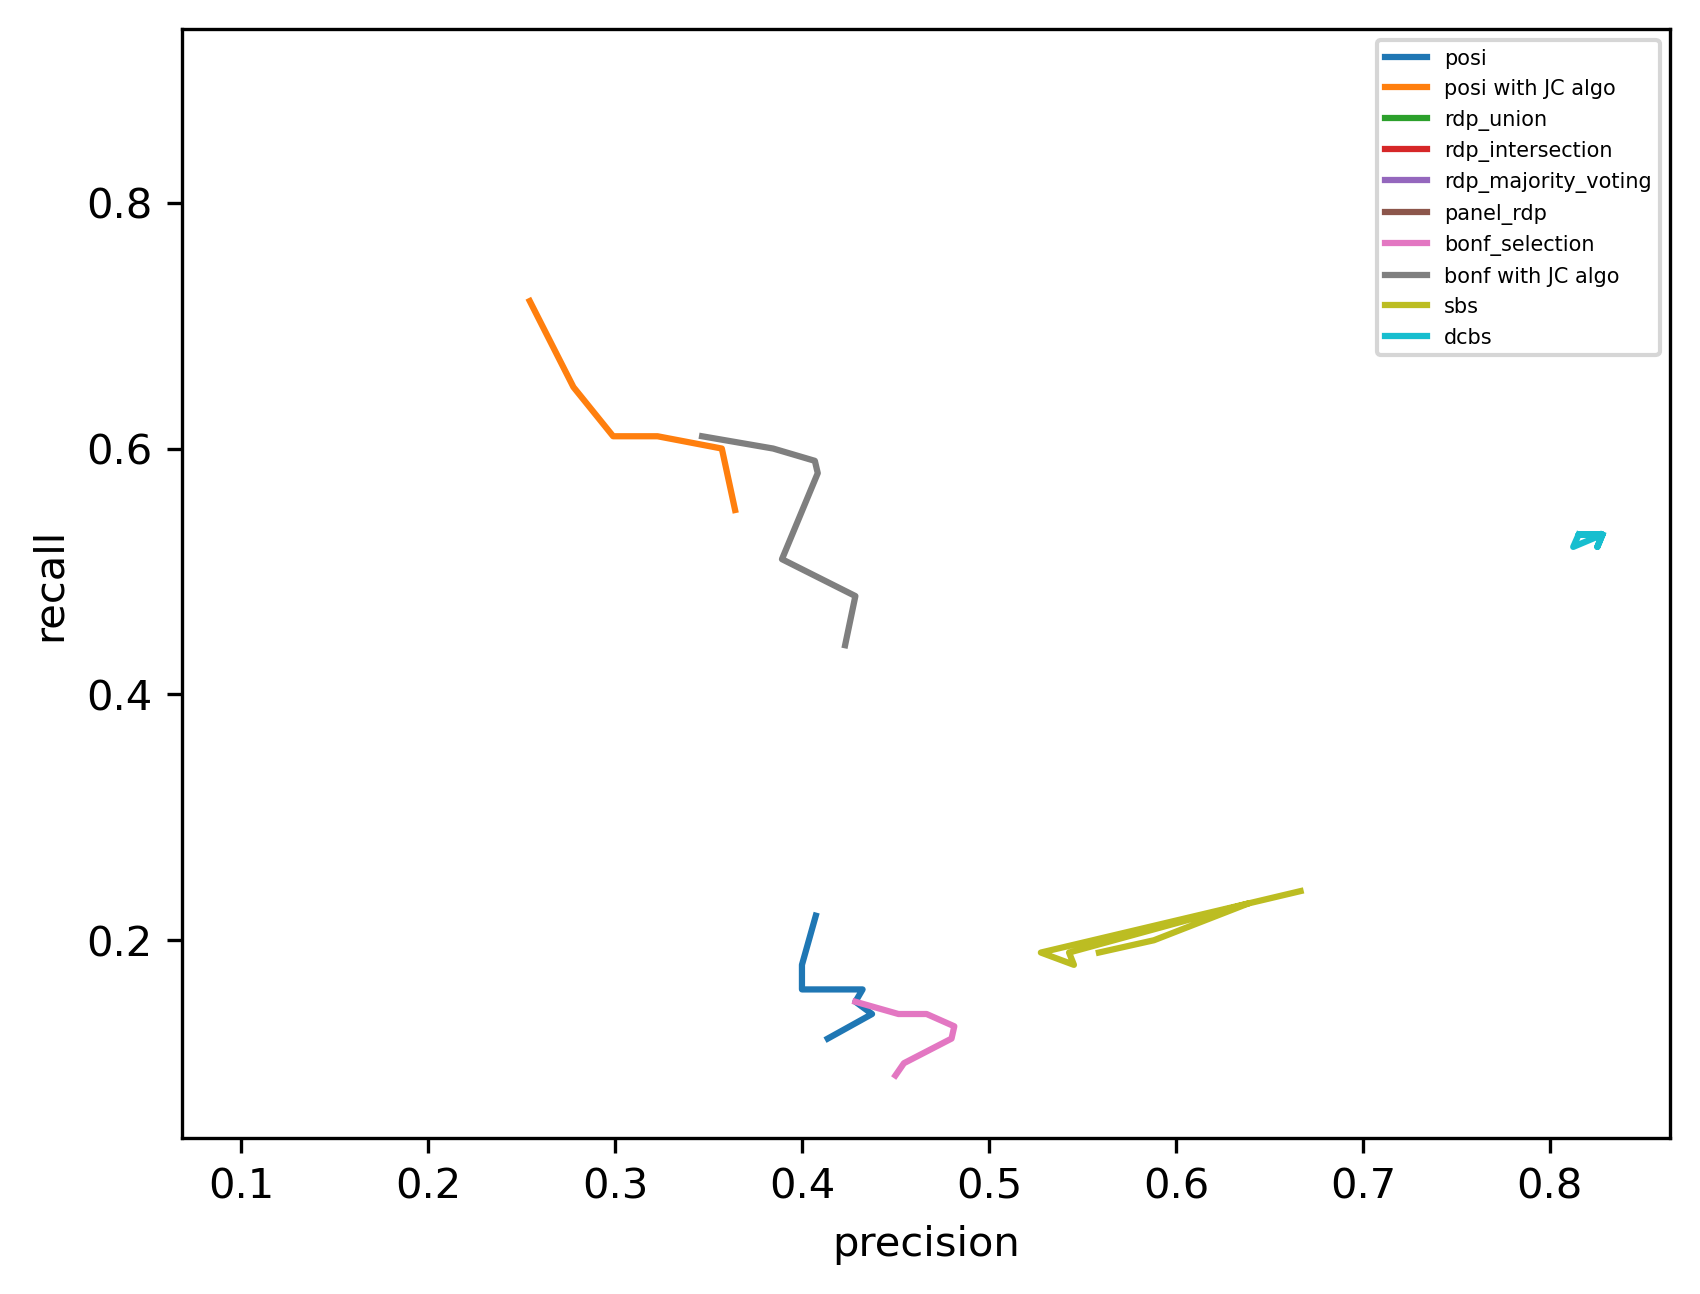

In [40]:

lvbd = 1
n=200
stair = rst_df.staircase[0]
tmp = rst_df[ (rst_df['level_bounds'] == lvbd) & (rst_df['N'] == n)]
legend = []
for method in tmp.method.unique():
    x=[]
    y=[]
    legend.append(method)
    for gamma in tmp.posi_gamma.unique():
        
        x.append(tmp[(tmp['posi_gamma'] == gamma) &  (tmp['method'] == method)]['precision'].values[0])
        y.append(tmp[(tmp['posi_gamma'] == gamma) &  (tmp['method'] == method)]['recall'].values[0])
    # print(method, x,y)
    plt.plot(x, y)    
plt.xlabel('precision')
plt.ylabel('recall')
# plt.legend()
plt.legend(legend, fontsize=5)
plt.show()
plt.title(f"bound={lvbd}_N={n}_staircase={stair}")

In [7]:
tmp

,method,precision,recall,accuracy,Type II error,Type I error,# selected,# false selection,# correct selection,# ommited,rho,f1,SNR,posi_gamma,J,T,N,level_bounds,partial_effect_ratio,staircase
210,posi,NaN,0.02,0.966667,0.98,NaN,0.4,0.2,0.2,9.8,0.098376,0.036364,0.013448,0.001,0.8,300.0,20.0,1.0,1.0,True
211,posi with JC algo,NaN,0.06,0.962667,0.94,NaN,2.4,1.8,0.6,9.4,0.097293,0.094872,0.013448,0.001,0.8,300.0,20.0,1.0,1.0,True
212,rdp_union,0.290551,0.44,0.944667,0.56,0.709449,15.4,11.0,4.4,5.6,NaN,0.349247,0.013448,0.001,0.8,300.0,20.0,1.0,1.0,True
213,rdp_intersection,NaN,0.00,0.966667,1.00,NaN,0.0,0.0,0.0,10.0,NaN,0.000000,0.013448,0.001,0.8,300.0,20.0,1.0,1.0,True
214,rdp_majority_voting,0.500000,0.08,0.966000,0.92,0.500000,1.8,1.0,0.8,9.2,NaN,0.136364,0.013448,0.001,0.8,300.0,20.0,1.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,panel_rdp,1.000000,0.10,0.970000,0.90,0.000000,1.0,0.0,1.0,9.0,NaN,0.181818,0.013448,0.050,0.8,300.0,20.0,1.0,1.0,True
276,bonf_selection,NaN,0.06,0.968000,0.94,NaN,0.8,0.2,0.6,9.4,NaN,0.106061,0.013448,0.050,0.8,300.0,20.0,1.0,1.0,True
277,bonf with JC algo,0.233333,0.08,0.962000,0.92,0.766667,3.0,2.2,0.8,9.2,NaN,0.118681,0.013448,0.050,0.8,300.0,20.0,1.0,1.0,True
278,sbs,0.383333,0.09,0.964333,0.91,0.616667,2.5,1.6,0.9,9.1,NaN,0.144872,0.013448,0.050,0.8,300.0,20.0,1.0,1.0,True
